
*   Setting up dependencies and loading in data

In [ ]:
# Import dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error

In [ ]:
# Load in 2020-2023 dataset and add next weeks score to week 30 (future score)

s2020 = pd.read_csv("Week 30 to week 31/2020_gw30.csv")
s2020['was_home'] = s2020['was_home'].astype(int)
temp = pd.read_csv("Week 30 to week 31/2020_gw31.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2020 = s2020.merge(temp[['name', 'future_points']], on='name', how='inner')


s2021 = pd.read_csv("Week 30 to week 31/2021_gw30.csv")
s2021['was_home'] = s2021['was_home'].astype(int)
temp = pd.read_csv("Week 30 to week 31/2021_gw31.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2021 = s2021.merge(temp[['name', 'future_points']], on='name', how='inner')

s2022 = pd.read_csv("Week 30 to week 31/2022_gw30.csv")
s2022['was_home'] = s2022['was_home'].astype(int)
temp = pd.read_csv("Week 30 to week 31/2022_gw31.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2022 = s2022.merge(temp[['name', 'future_points']], on='name', how='inner')

s2023 = pd.read_csv("Week 30 to week 31/2023_gw30.csv")
s2023['was_home'] = s2023['was_home'].astype(int)
temp = pd.read_csv("Week 30 to week 31/2023_gw31.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2023 = s2023.merge(temp[['name', 'future_points']], on='name', how='inner')

s2024 = pd.read_csv("Week 30 to week 31/current_week30.csv")
s2024['was_home'] = s2024['was_home'].astype(int)
temp = pd.read_csv("Week 30 to week 31/current_week31.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2024 = s2024.merge(temp[['name', 'future_points']], on='name', how='inner')

In [ ]:
# Merge 2020-2023 data as train data

train = pd.concat([s2020, s2021])
train.reset_index(drop=True, inplace=True)
train = pd.concat([train, s2022])
train.reset_index(drop=True, inplace=True)
train = pd.concat([train, s2023])
train.reset_index(drop=True, inplace=True)

In [ ]:
print(len(train))

2580


* Process data and set it up for the model

In [ ]:
#Drop non-relevant columns

train.drop(columns=["expected_assists", "expected_goal_involvements", "expected_goals",
                    "expected_goals_conceded", "starts", "transfers_balance",	"transfers_in",
                    "transfers_out", "bps", "xP", "element"], inplace=True)

s2024.drop(columns=["expected_assists", "expected_goal_involvements", "expected_goals",
                    "expected_goals_conceded", "starts", "transfers_balance",	"transfers_in",
                    "transfers_out", "bps", "xP", "element"], inplace=True)

In [ ]:
train.head()

,name,position,team,assists,bonus,clean_sheets,creativity,fixture,goals_conceded,goals_scored,...,saves,selected,team_a_score,team_h_score,threat,total_points,value,was_home,yellow_cards,future_points
0,Max Thompson,FWD,Burnley,0,0,0,0.0,297,0,0,...,0,9846,2,3,0.0,0,45,0,0,0
1,Willy Boly,DEF,Wolves,0,0,0,0.0,298,0,0,...,0,94318,3,2,0.0,0,54,1,0,0
2,Ciaran Clark,DEF,Newcastle,0,0,0,0.0,296,0,0,...,0,14415,2,2,0.0,0,45,1,0,2
3,Luke Cundle,MID,Wolves,0,0,0,0.0,298,0,0,...,0,1139,3,2,0.0,0,45,1,0,0
4,Matt Ritchie,MID,Newcastle,0,0,0,20.3,296,2,0,...,0,3302,2,2,16.0,2,49,1,0,2


In [ ]:
train_by_position = {}
test_by_position = {}


# Iterate over values and make different values based on the position

for position in train["position"].unique():
    train_by_position[position] = train[train["position"] == position]

for position in s2024["position"].unique():
    test_by_position[position] = s2024[s2024["position"] == position]

## ***Scikit-Learn Models***

In [ ]:
features = [
    'assists','bonus', 'creativity','clean_sheets','minutes', 'goals_conceded',
    'goals_scored', 'influence', 'threat', 'ict_index', 'own_goals',
    'penalties_missed',	'penalties_saved',	'red_cards', 'yellow_cards',
    'saves', 'total_points', 'value',	'was_home'
]

In [ ]:
for i in train_by_position:
    X_train = train_by_position[i][features]
    y_train = train_by_position[i]['future_points']
    X_test = test_by_position[i][features]
    y_test = test_by_position[i]['future_points']

    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_test = y_test.to_numpy()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print Metrics
    print(i)
    print(f"Mean Squared Error (MSE):      {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE):      {mae:.2f}")
    print()

FWD
Mean Squared Error (MSE):      4.74
Root Mean Squared Error (RMSE): 2.18
Mean Absolute Error (MAE):      1.26

DEF
Mean Squared Error (MSE):      2.71
Root Mean Squared Error (RMSE): 1.65
Mean Absolute Error (MAE):      0.90

MID
Mean Squared Error (MSE):      4.19
Root Mean Squared Error (RMSE): 2.05
Mean Absolute Error (MAE):      1.08

GK
Mean Squared Error (MSE):      2.14
Root Mean Squared Error (RMSE): 1.46
Mean Absolute Error (MAE):      0.54



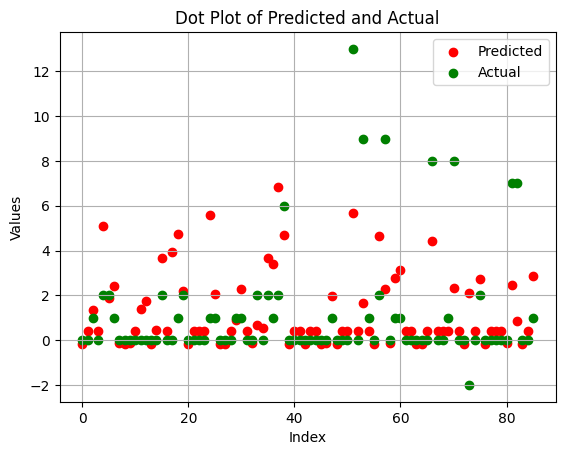

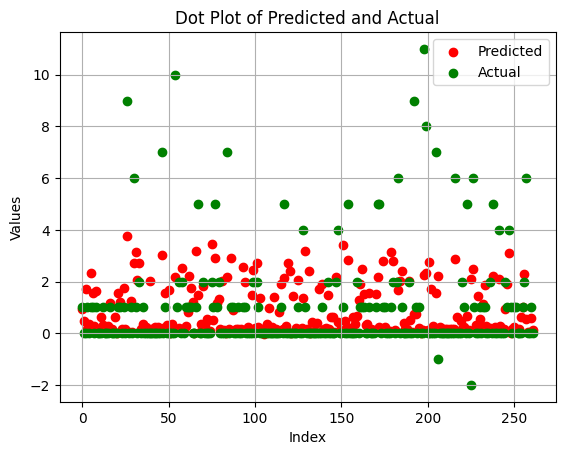

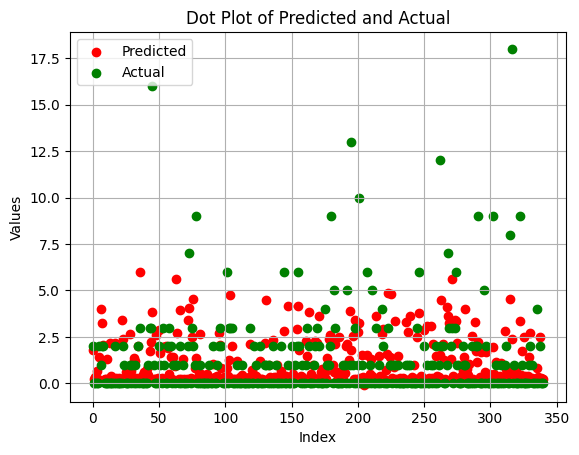

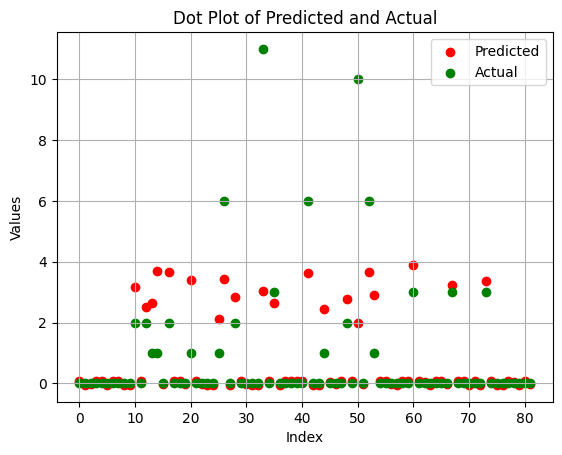

In [ ]:
# Graph differences between predicted and actual
for i in train_by_position:
    X_train = train_by_position[i][features]
    y_train = train_by_position[i]['future_points']
    X_test = test_by_position[i][features]
    y_test = test_by_position[i]['future_points']

    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_test = y_test.to_numpy()

    x = np.arange(len(y_pred))

    # Plot both arrays as dot plots
    plt.scatter(x, y_pred, color='Red', label='Predicted')
    plt.scatter(x, y_test, color='Green', label='Actual')

    # Add labels, legend, and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Dot Plot of Predicted and Actual')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

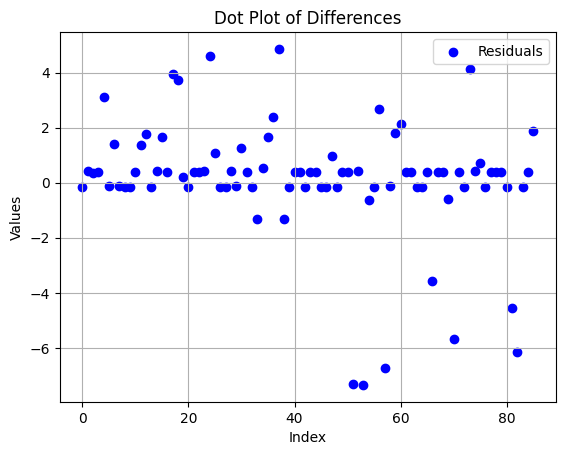

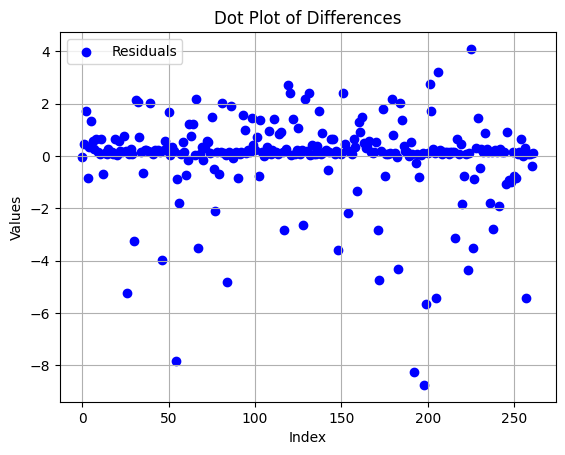

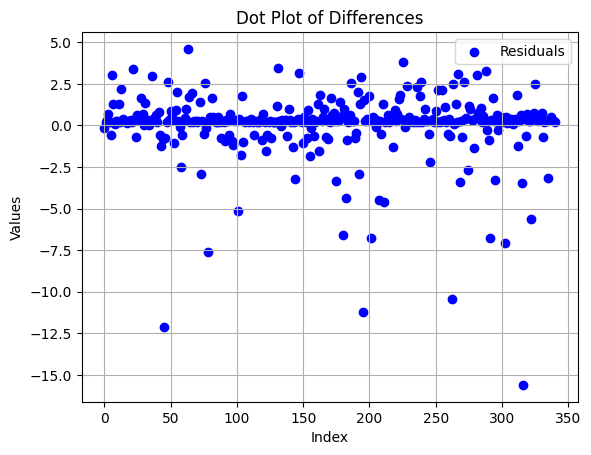

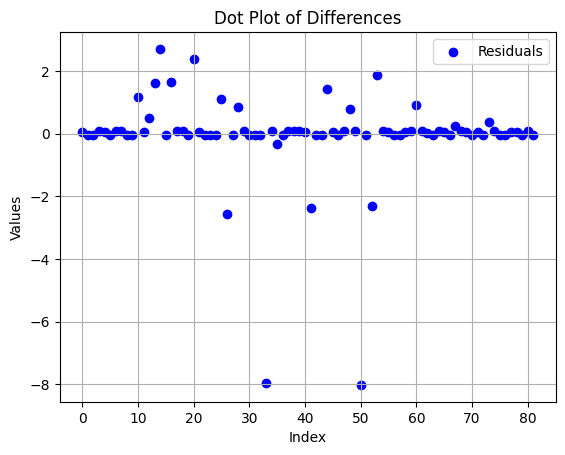

In [ ]:
# Graph differences between predicted and actual
for i in train_by_position:
    X_train = train_by_position[i][features]
    y_train = train_by_position[i]['future_points']
    X_test = test_by_position[i][features]
    y_test = test_by_position[i]['future_points']

    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_test = y_test.to_numpy()

    array = (y_pred - y_test)

    x = np.arange(len(array))

    # Plot both arrays as dot plots
    plt.scatter(x, array, color='blue', label='Residuals')

    # Add labels, legend, and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Dot Plot of Differences')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

In [ ]:
perfect = 0
small = 0
medium = 0
large = 0

for i in train_by_position:
    X_train = train_by_position[i][features]
    y_train = train_by_position[i]['future_points']
    X_test = test_by_position[i][features]
    y_test = test_by_position[i]['future_points']

    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred = np.round(y_pred)

    residual = abs(y_pred - y_test)

    for j in residual:
      if (j == 0):
        perfect = perfect + 1
      elif (j <= 2):
        small = small + 1
      elif (j <= 4):
        medium = medium + 1
      else:
        large = large + 1

    test_by_position[i]['predicted points for this week'] = y_pred

<ipython-input-352-4766e27b80db>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_by_position[i]['predicted points for this week'] = y_pred
<ipython-input-352-4766e27b80db>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_by_position[i]['predicted points for this week'] = y_pred
<ipython-input-352-4766e27b80db>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

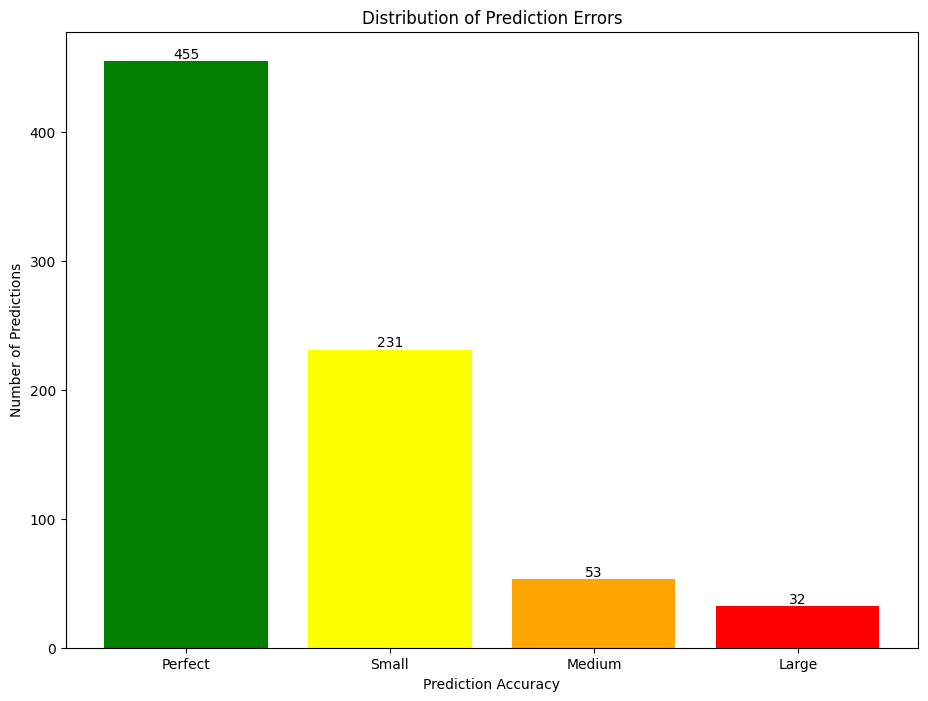

In [ ]:
# Data for the bar graph
categories = ['Perfect', 'Small', 'Medium', 'Large']
values = [perfect, small, medium, large]


# Create the bar graph
plt.figure(figsize=(11, 8))  # Adjust figure size if needed
plt.bar(categories, values, color=['green', 'yellow', 'orange', 'red'])

# Add labels and title
plt.xlabel('Prediction Accuracy')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Prediction Errors')

# Add value labels on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the graph
plt.show()

# CURRENT YEAR TESTING

In [ ]:
# Load in 2020-2023 dataset and add next weeks score to week 30 (future score)

s2020 = pd.read_csv("Week 31 to week 32/2020_gw31.csv")
s2020['was_home'] = s2020['was_home'].astype(int)
temp = pd.read_csv("Week 31 to week 32/2020_gw32.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2020 = s2020.merge(temp[['name', 'future_points']], on='name', how='inner')


s2021 = pd.read_csv("Week 31 to week 32/2021_gw31.csv")
s2021['was_home'] = s2021['was_home'].astype(int)
temp = pd.read_csv("Week 31 to week 32/2021_gw32.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2021 = s2021.merge(temp[['name', 'future_points']], on='name', how='inner')

s2022 = pd.read_csv("Week 31 to week 32/2022_gw31.csv")
s2022['was_home'] = s2022['was_home'].astype(int)
temp = pd.read_csv("Week 31 to week 32/2022_gw32.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2022 = s2022.merge(temp[['name', 'future_points']], on='name', how='inner')

s2023 = pd.read_csv("Week 31 to week 32/2023_gw31.csv")
s2023['was_home'] = s2023['was_home'].astype(int)
temp = pd.read_csv("Week 31 to week 32/2023_gw32.csv")
temp = temp.rename(columns={'total_points': 'future_points'})
s2023 = s2023.merge(temp[['name', 'future_points']], on='name', how='inner')

s2024 = pd.read_csv("Week 31 to week 32/current_week31.csv")
s2024['was_home'] = s2024['was_home'].astype(int)

In [ ]:
# Merge 2020-2023 data as train data

train = pd.concat([s2020, s2021])
train.reset_index(drop=True, inplace=True)
train = pd.concat([train, s2022])
train.reset_index(drop=True, inplace=True)
train = pd.concat([train, s2023])
train.reset_index(drop=True, inplace=True)

In [ ]:
#Drop non-relevant columns

train.drop(columns=["expected_assists", "expected_goal_involvements", "expected_goals",
                    "expected_goals_conceded", "starts", "transfers_balance",	"transfers_in",
                    "transfers_out", "bps", "xP", "element"], inplace=True)

s2024.drop(columns=["expected_assists", "expected_goal_involvements", "expected_goals",
                    "expected_goals_conceded", "starts", "transfers_balance",	"transfers_in",
                    "transfers_out", "bps", "xP", "element"], inplace=True)

In [ ]:
train_by_position = {}
test_by_position = {}


# Iterate over values and make different values based on the position

for position in train["position"].unique():
    train_by_position[position] = train[train["position"] == position]

for position in s2024["position"].unique():
    test_by_position[position] = s2024[s2024["position"] == position]

In [ ]:
for i in train_by_position:
    X_train = train_by_position[i][features]
    y_train = train_by_position[i]['future_points']
    X_test = test_by_position[i][features]

    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_by_position[i]['predicted points for this week'] = y_pred

<ipython-input-312-3221564e8a41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_by_position[i]['predicted points for this week'] = y_pred
<ipython-input-312-3221564e8a41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_by_position[i]['predicted points for this week'] = y_pred
<ipython-input-312-3221564e8a41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
combined = pd.concat([test_by_position["MID"], test_by_position["DEF"]])
combined.reset_index(drop=True, inplace=True)
combined = pd.concat([combined, test_by_position["FWD"]])
combined.reset_index(drop=True, inplace=True)
combined = pd.concat([combined, test_by_position["GK"]])
combined.reset_index(drop=True, inplace=True)

In [ ]:
matching_rows = combined[combined["name"].str.contains("Verbruggen", na=False)]

if not matching_rows.empty:
    print("Rows where 'xyz' is part of the 'name' column:")
    print(matching_rows)
else:
    print("'xyz' is not part of any value in the 'name' column.")

Rows where 'xyz' is part of the 'name' column:
                name position      team  assists  bonus  clean_sheets  \
715  Bart Verbruggen       GK  Brighton        0      0             0   

     creativity  fixture  goals_conceded  goals_scored  ...  saves  selected  \
715         0.0      303               2             0  ...      1    331178   

    team_a_score  team_h_score  threat  total_points  value  was_home  \
715            1             2     0.0             1     45         0   

     yellow_cards  predicted points for this week  
715             0                        3.298016  

[1 rows x 38 columns]
